<a href="https://colab.research.google.com/github/rpdieego/Kaggle_HousePrices/blob/master/Kaggle_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competitions - House Prices: Advanced Regression Techniques

[Click here to check the related page on Kaggle for this challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)



**Step 1 - Defining the Problem**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

**Goal**

Our goal here is to predict the final price of each home based on 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa (USA).

**Performance Metrics**

The score is based on the Root Mean Square Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

*Logarithm is taken in order to errors on the predictions of expensive and cheap houses affect the results equally.*




# Step 2 - Obtaining the Data

The Ames Housing Dataset was compiled by Dean De Cock or use in data science education.

Kaggle already split the dataset in two different groups:

*   Train Dataset (train.csv) - Used to build and train our machine learning model. This set contains the price of the houses, which we are going to use as our target variable;
*   Test Dataset (test.csv) - Used to generate predictions through our model and submit the results into Kaggle;


In [2]:
# import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Opening the Dataframes using Pandas

url_train = 'https://raw.githubusercontent.com/rpdieego/Kaggle_HousePrices/master/train.csv'
url_test = 'https://raw.githubusercontent.com/rpdieego/Kaggle_HousePrices/master/test.csv'

train_df = pd.read_csv(url_train)
test_df = pd.read_csv(url_test)

# Checking the dimensions of the Datasets

print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(train_df.shape[1], train_df.shape[0]))
print("\n")
print("Test Dataset \n Variables:\t{}\n Inputs:\t{}".format(test_df.shape[1], test_df.shape[0]))

Train Dataset 
 Variables:	81
 Inputs:	1460


Test Dataset 
 Variables:	80
 Inputs:	1459


# Section 3 - Exploring the Data

**Data Dictionary**

As we have too many variables, and it would take a lot of space in this notebook, the dictionary is available [here](https://raw.githubusercontent.com/rpdieego/Kaggle_HousePrices/master/data_description.txt)

In [3]:
#Checking the type of each variable

quantitative = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quantitative.remove('Id')
qualitative = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

print("Quantitative Variables: \t\n{}".format(quantitative))
print("\n")
print("Qualitative Variables: \t\n{}".format(qualitative))

Quantitative Variables: 	
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Qualitative Variables: 	
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fi

**Data Distribution - Quantitative Values**



In [4]:
# Statistical Description of the Data

train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Data Distribution - Qualitative Variables**

In [5]:
# Statistical Description for the Data

train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


**Missing Values**

As we can see in the graph below, 19 of our variables have missing values, being that 5 of them have more than 50% empty cells:

*   *PoolQC* - Pool Quality
*   *MiscFeature* - Miscellaneous feature not covered in other categories
*   *Alley* - Type of alley access to property
*   *Fence* - Fence Quality
*   *FireplaceQu* - Fireplace quality


Checking the description of these variables on the [data dictionary](https://raw.githubusercontent.com/rpdieego/Kaggle_HousePrices/master/data_description.txt) we can see that a missing value means that the house does not have that feature. Hence it is understandable, and quite predictable, as normally most of house do not have pools or fireplaces for example.




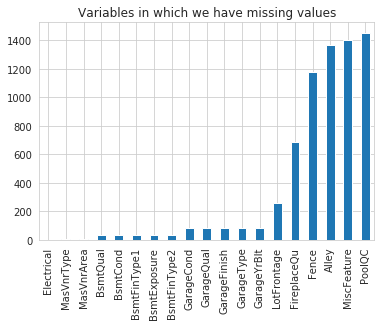

In [6]:
#Counting and Plotting Variables in which we have missing values

sns.set_style("whitegrid")
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure();plt.title('Variables in which we have missing values')
missing.plot.bar()

**Exploring some of the most important variables**

As we have too many variables on this dataset, ploting histograms for all of them at once shall not be very helpfull. Then, we are going to take a look first of all in our target variable *SalePrice*

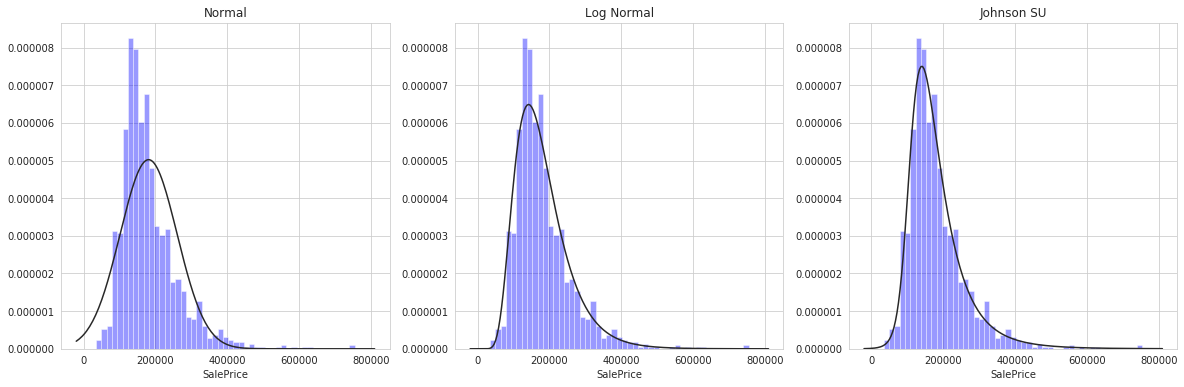

In [7]:
#Fitting distributions to the variable SalePrice


fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(20,6))
axis1.title.set_text('Normal')
axis2.title.set_text('Log Normal')
axis3.title.set_text('Johnson SU')

sns.distplot(train_df['SalePrice'], kde=False, color='blue', ax=axis1, fit=stats.norm)
sns.distplot(train_df['SalePrice'] , kde=False, color='blue', ax=axis2, fit=stats.lognorm)
sns.distplot(train_df['SalePrice'], kde=False, color='blue', ax=axis3, fit=stats.johnsonsu)


plt.show()

As we can see, the distribution of the Sale Prices is skewed to the right. This is also a expected behavior for this variable, as few people are able to afford very expensive houses (not only in Ames, but almost everywhere). 
It`s also clear that the prices don't follow a normal distribution, so we need to transform it before running any linear regression.

*   [Linear Regression Assumptions ](https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1)


We should also check the normality for the other variables:


In [8]:
#Testing the normality of quantitative variables

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train_df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


Just as SalePrice, all the other quantitative variables are non linear and should be transformed as well during our preprocessing step.

In order to get understand better the dataset, it would be interesting to check the variables which have a high correlation with the *SalePrice*

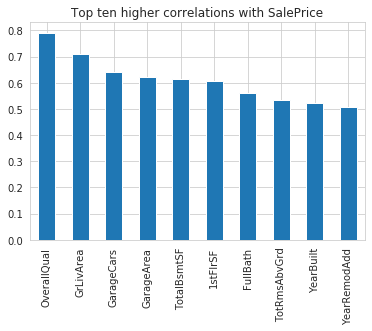

In [9]:
# Correlation Matrix

corr = train_df[quantitative].corr()

#plotting the top 10 correlated variables

SalePrice_corr=corr['SalePrice'].sort_values(ascending=False)
plt.figure();plt.title('Top ten higher correlations with SalePrice')
SalePrice_corr[1:11].plot.bar()

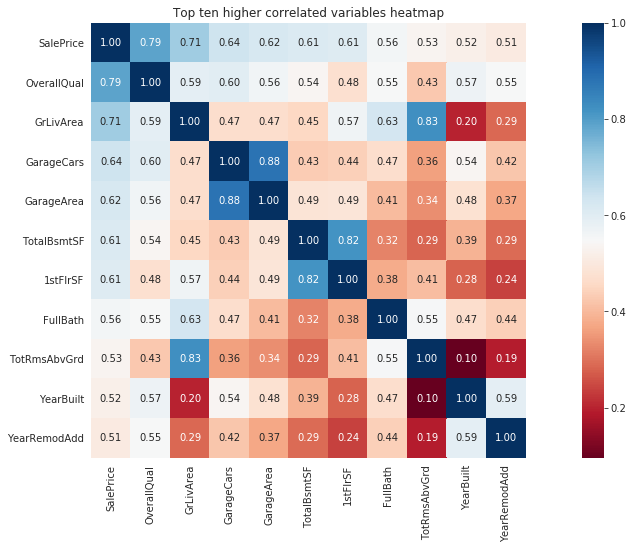

In [10]:
# Heatmap of the Correlation of SalePrice and the top ten correlated variables

top_ten_corr_labels=SalePrice_corr[0:11].keys()
top_ten_corr = train_df[top_ten_corr_labels].corr()

plt.figure(figsize=(20,8));plt.title('Top ten higher correlated variables heatmap')
sns.heatmap(data=top_ten_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

As shown on the bar graph above, there are some variables that are strongly correlated to SalePrice, and the top ten are all above **0.5**:

*   *OverallQual* - Rates the overall material and finish of the house - **correlation:0.79**
*   *GrLivArea* - Above grade (ground) living area square feet - **correlation: 0.71**
*   *GarageCars* - Size of garage in car capacity - **correlation: 0.64**
*   *GarageArea* - Size of garage in square feet - **correlation: 0.62**
*   *TotalBsmtSF* - Total square feet of basement area - **correlation: 0.61**
*   *1stFlrSF* - First Floor square feet - **correlation: 0.61**
*   *FullBath* - Full bathrooms above grade - **correlation: 0.56**
*   TotRmsAbvGrd - Total rooms above grade (does not include bathrooms) - **correlation: 0.53**
*   *YearBuilt* - Original construction date - **correlation: 0.52**
*   *YearRemodAdd* - Remodel date (same as construction date if no remodeling or additions) - **correlation: 0.51**


And the heatmap just below the top ten correlated variables to sales price show us the correlations between these variables, and it is not difficult to see that multicolinearity is also an issue here, as for example:

*   *GarageArea x GarageCars* - **correlation: 0.88**
*   *TotRmsAbvGrd x GrLivArea* - **correlation: 0.83**
*   *1stFlrSF x TotalBsmtSF* - **correlation: 0.82**
*   *FullBath x GrLivArea* - **correlation: 0.63**
*   *YearRemodAdd x YearBuilt* - **correlation: 0.59**




I`m not surprised at all with the two variables which have the hightest correlations with Sale Price: *Overarall Quality* and *Above Grade Living Area*, as normally people value quality and the bigger the house the higher the price.







**Investigating possible outliers**

An easy way to visualy investigate outliers would be taking a look at the scatter plots of the five variables which are correlated the most with SalePrice:

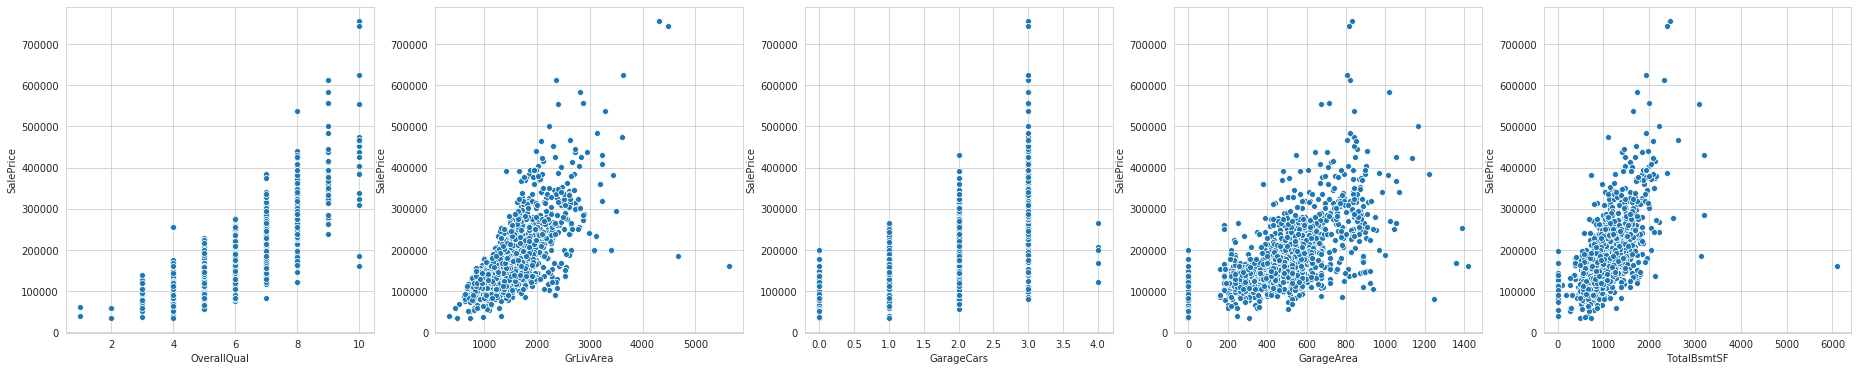

In [11]:
# Scatterplots
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(1,5, figsize=(32,6))
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_df, ax=axis1)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df, ax=axis2)
sns.scatterplot(x='GarageCars',y='SalePrice',data=train_df, ax=axis3)
sns.scatterplot(x='GarageArea',y='SalePrice',data=train_df, ax=axis4)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train_df, ax=axis5)

As we could already seen on the distribution graph of SalePrice, there are two house with really high prices (Above 700.000,00 USD)

Besides that, by looking at the scatter plots, one can see that no outliers seems to be shown on the *OverallQual* and *GarageCars* graphs. In the other hand, there are some poins that call our attention in the other three:

*   The two houses with high above grade living area and low price;
*   The four houses with high Garage Area and low price;
*   The one house with high basement and low price; 

In [12]:
# Indexes of the Potential SalePrice Outliers
SalePrice_Outlier_Idx = train_df.query('SalePrice > 700000').index.tolist()
SalePrice_Outlier_Idx

[691, 1182]

In [13]:
# Indexes of the Potential GrLivArea Graph Outliers
GrLivArea_Outlier_Idx = train_df.query('SalePrice < 200000 & GrLivArea > 4000').index.tolist()
GrLivArea_Outlier_Idx

[523, 1298]

In [21]:
# Indexes of the Potential GarageArea Graph Outliers
GarageArea_Outlier_Idx = train_df.query('SalePrice < 300000 & GarageArea > 1200').index.tolist()
GarageArea_Outlier_Idx

[581, 1061, 1190, 1298]

In [20]:
# Indexes of the Potential TotalBsmtSF Graph Outliers
TotalBsmtSF_Outlier_Idx = train_df.query('SalePrice < 200000 & TotalBsmtSF > 6000').index.tolist()
TotalBsmtSF_Outlier_Idx

[1298]

In [28]:
# Potential Outliers Index List

Potential_Outliers_Idx = SalePrice_Outlier_Idx + GrLivArea_Outlier_Idx + GarageArea_Outlier_Idx + TotalBsmtSF_Outlier_Idx
Potential_Outliers_Idx=list(set(Potential_Outliers_Idx))
Potential_Outliers_Idx.sort()
Potential_Outliers_Idx

[523, 581, 691, 1061, 1182, 1190, 1298]

In [34]:
# Top ten characteristics for our list of potential outliers

train_df.loc[Potential_Outliers_Idx,top_ten_corr_labels]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
523,184750,10,4676,3,884,3138,3138,3,11,2007,2008
581,253293,8,2042,3,1390,2042,2042,2,8,2008,2009
691,755000,10,4316,3,832,2444,2444,3,10,1994,1995
1061,81000,3,894,3,1248,894,894,1,6,1935,1950
1182,745000,10,4476,3,813,2396,2411,3,10,1996,1996
1190,168000,4,1622,4,1356,1249,1622,1,7,1961,1975
1298,160000,10,5642,2,1418,6110,4692,2,12,2008,2008


*   Houses with really high prices ( > 700.000,00 USD) - **Indexes 691 and 1182**

      By looking at the features of these two houses, it`s possible to conclude that the high price is undestandable, as their Overall Quality is at the highest, their living area above ground is quite huge, both houses are new, and also both figure well in all of the most correlated features with price.
      Hence, these two **shall not be considered outliers**.


*   The two houses with high above grade living area and low price - **Indexes 523 and 1298**

     In the other hand, these price of these two houses don`t seem to follow any logic if our judgment is based only in these features. As the two houses with the highest prices, these two have also the best ratio in Overall Quality, they are new and are well place in all the other desirable characteristics.

     *Hypothesis* - Is there another factor which could drop the prices this much? It worth investigating a little bit more these two cases, because they are strong candidates to outliers.


*   The four houses with high Garage Area and low price - **Indexes 581, 1061, 1190, 1298**

     Besides the house **#1298**, it`s understandable the lower price for these houses, as they are quite smaller and the Overall Quality is way above the other houses we have analyzed.
     Hence, 581, 1061 and 1190 **shall not be considered outlier**s as well.

*   The one house with high basement and low price; - **Index 1298**

      Once again our friend **#1298** showed up.



In summary, only the houses **#523** and **#1298** are still candidates for outliers.

It worth investigating some other categorical variables in order to understand better if there are any factor which could justify the huge price difference for these two houses before removing them from our dataset.


